<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/California__Housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Pricing Dataset Using supervised learning

#Work flow

data fetching --> data preprocessing ---> data analysis --->train test split ---> XGBoost Regressor ---> model valuation



In [13]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets # to get the california housing price data
from xgboost import XGBRegressor
from sklearn import metrics

In [21]:
# Importing the california house price dataset
from sklearn.datasets import fetch_california_housing
c_data= fetch_california_housing() # getting the dataset

In [22]:
print(c_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [23]:
# convert to pandas dataframe
c_data_pd = pd.DataFrame(c_data.data, columns = c_data["feature_names"] )

In [24]:
# printing first five rows
c_data_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
# add target columns to the dataframe
c_data_pd['price'] = c_data.target

In [28]:
c_data_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
#checking the number of rows and colums in the dataframe
c_data_pd.shape

(20640, 9)

In [30]:
c_data_pd.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [31]:
#Statistical measures of the dataset
c_data_pd.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

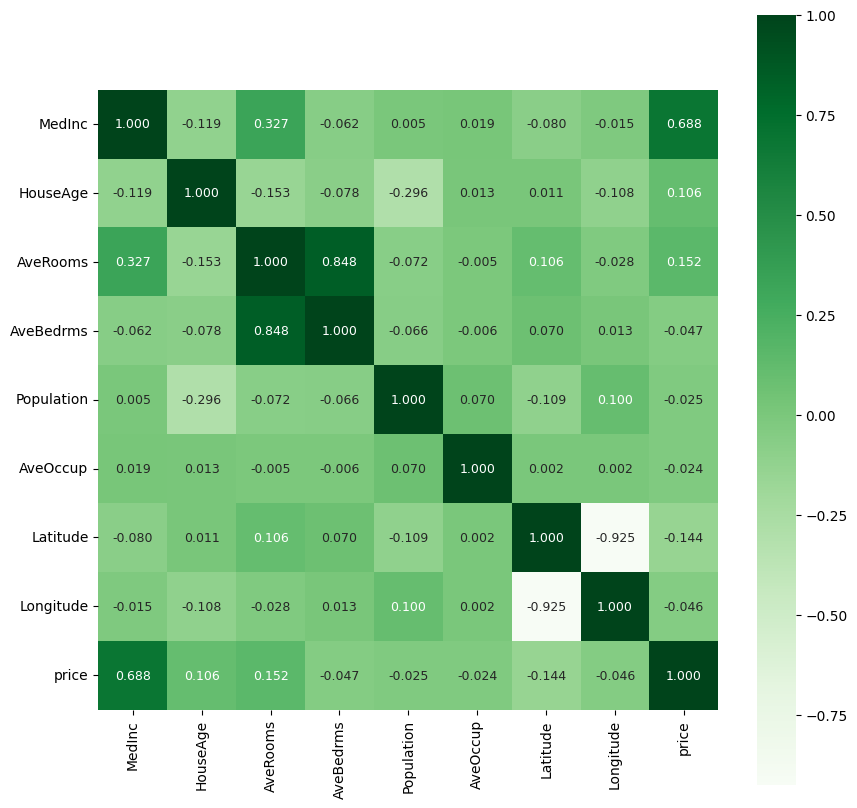

In [38]:
# correlation between various features
correlation = c_data_pd.corr()

# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))

# Heatmap

sns.heatmap(correlation, cbar = True, square = True, fmt = '.3f', annot = True, annot_kws={'size': 9}, cmap = "Greens")


In [44]:
# split the data to feature and target variable
feature = c_data_pd.drop(["price"], axis = 1)
target = c_data_pd["price"]

In [45]:
# standardizing the feature variable
scaler = StandardScaler()

In [46]:
#fitting the standardizing data
scaler.fit(feature)

StandardScaler()

In [60]:
#transforming the feature variable
X = scaler.transform(feature)
Y = target

In [61]:
# splitting to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print(X_train)

[[-0.32165429  0.34647803 -0.16625886 ...  0.05980847 -1.36797628
   1.26764451]
 [-0.03061993  1.61780729 -0.3861807  ... -0.12830597 -0.87169852
   0.7036268 ]
 [ 0.1503488  -1.95780625  0.08764093 ... -0.03345346 -0.45501247
  -0.45435647]
 ...
 [-0.49283239  0.58485227 -0.58294927 ...  0.02517025 -0.74997001
   0.59381804]
 [ 0.97302487 -1.08376738  0.39058403 ...  0.01042151  0.91209231
  -1.19306993]
 [-0.68174943  1.85618152 -0.81905034 ... -0.09262259  1.00104776
  -1.42267006]]


In [64]:
#model training with XGBoost.Regressor - decision tree model
#loading the model
model = XGBRegressor()

In [67]:
#training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
#evaluating our training model

#Make prediction on training data

prediction = model.predict(X_train)
prediction

array([1.2811276, 3.5806673, 1.795477 , ..., 2.308142 , 2.5287933,
       3.645046 ], dtype=float32)

In [79]:
# evaluating the model

# R squared error for regression and mean square error

score_1 = metrics.r2_score(Y_train, prediction)

print (f"The r2 error is {score_1}")

# mean absolute error

score_2 = metrics.mean_absolute_error(Y_train, prediction)

print (f"The mean absolute error is {score_2}")

# mean squared error

score_3 = metrics.mean_squared_error(Y_train, prediction)

print (f"The mean squared error is {score_3}")

The r2 error is 0.9445725845802867
The mean absolute error is 0.19257627556572793
The mean squared error is 0.07409416126887404


In [80]:
# testing the model

pr_test = model.predict(X_test)

In [81]:
#checking for accuracy on test data

# R squared error for regression and mean square error

score_4 = metrics.r2_score(Y_test, pr_test)

print (f"The r2 error is {score_4}")

# mean absolute error

score_5 = metrics.mean_absolute_error(Y_test, pr_test)

print (f"The mean absolute error is {score_5}")

# mean squared error

score_6 = metrics.mean_squared_error(Y_test, pr_test)

print (f"The mean squared error is {score_6}")

The r2 error is 0.8301370561019205
The mean absolute error is 0.30957335413783094
The mean squared error is 0.2225899267544737


# visualizing our actual and predicted prices

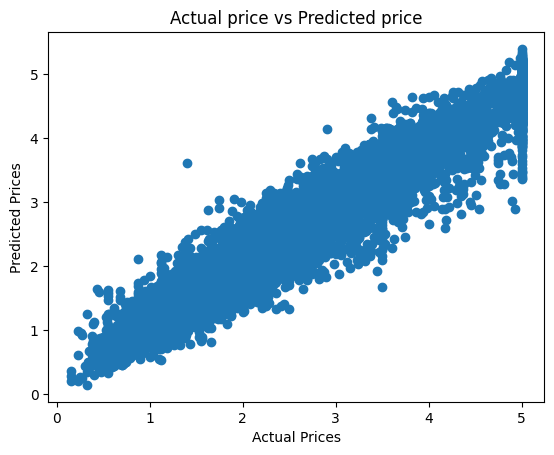

In [82]:
plt.scatter(Y_train, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted price")
plt.show()